In [1]:
#Discard the output of this cell
%%capture
#library that would take videos from youtube
!pip install pafy youtube-dl moviepy

In [2]:
import os
import cv2
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy.editor import *
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model



In [3]:
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [4]:
!pip install kaggle


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/My Drive/Kaggle_dataset'



In [8]:
%cd /content/drive/My Drive/Kaggle_dataset

/content/drive/My Drive/Kaggle_dataset


In [9]:
!ls

kaggle.json  ucf50-action-recognition-dataset


In [10]:
!kaggle datasets download -d vineethakkinapalli/ucf50-action-recognition-dataset



100% 3.02G/3.04G [00:42<00:00, 47.4MB/s]
100% 3.04G/3.04G [00:42<00:00, 77.3MB/s]


In [11]:
#empty folder
!mkdir ucf50-action-recognition-dataset
#convert zip file to particular folder
!mv ucf50-action-recognition-dataset.zip ucf50-action-recognition-dataset

mkdir: cannot create directory ‘ucf50-action-recognition-dataset’: File exists


In [12]:
%cd ucf50-action-recognition-dataset/

/content/drive/My Drive/Kaggle_dataset/ucf50-action-recognition-dataset


In [13]:
!unzip ucf50-action-recognition-dataset.zip

Archive:  ucf50-action-recognition-dataset.zip
replace UCF50/BaseballPitch/v_BaseballPitch_g01_c01.avi? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

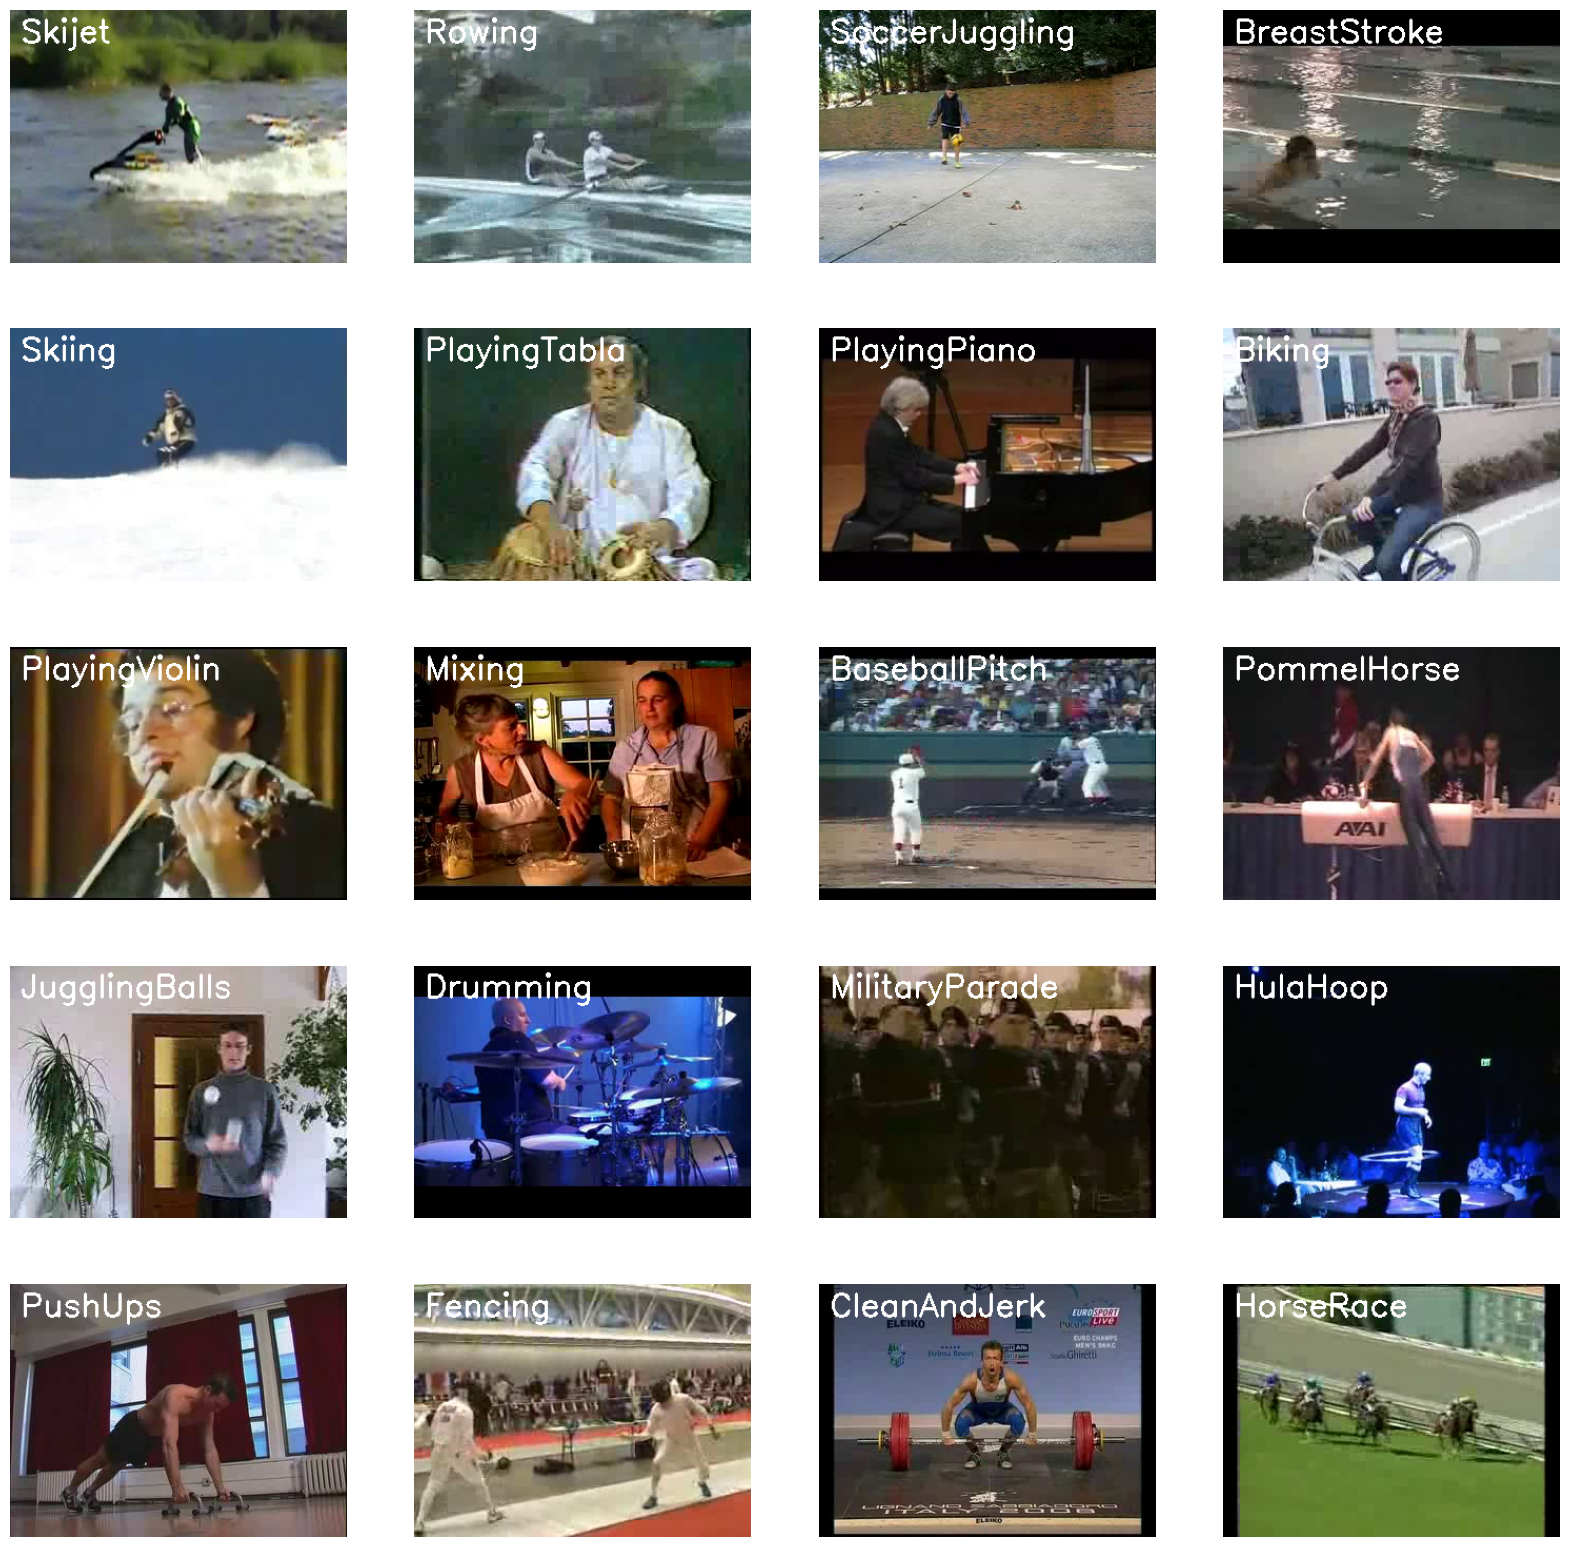

In [26]:
# Create a Matplotlib figure and state the size of the figure.
plt.figure(figsize = (20, 20))

# Get the names of all classes in UCF50.
all_classes_names = os.listdir('/content/drive/MyDrive/Kaggle_dataset/ucf50-action-recognition-dataset/UCF50')

# Create a list of 20 random values which will be in between 0-50, where 50 represents
# the total number of class in the dataset.
random_range = random.sample(range(len(all_classes_names)), 20)

# Iterating through all the created random values.
for counter, random_index in enumerate(random_range, 1):

    # Retrieve a Class Name using the Random Index.
    selected_class_Name = all_classes_names[random_index]

    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    video_files_names_list = os.listdir(f'/content/drive/MyDrive/Kaggle_dataset/ucf50-action-recognition-dataset/UCF50/{selected_class_Name}')

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file_name = random.choice(video_files_names_list)

    # Initialize a VideoCapture object to read from the video File.
    video_reader = cv2.VideoCapture(f'/content/drive/MyDrive/Kaggle_dataset/ucf50-action-recognition-dataset/UCF50/{selected_class_Name}/{selected_video_file_name}')

    # Read the first frame of the video file.
    _, bgr_frame = video_reader.read()

    # Release the VideoCapture object.
    video_reader.release()

    # Convert the frame from BGR into RGB format.
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Write the class name on the video frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Display the frame.
    plt.subplot(5, 4, counter);plt.imshow(rgb_frame);plt.axis('off')



In [27]:
# State the height and width of each video frame and those will be resized in our dataset.

IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64

# State the number of frames of a video that will be provided to the model as a single sequence.
# Each video will split into 20 frames
SEQUENCE_LENGTH = 20

# State the directory containing the UCF50 dataset.

DATASET_DIR = "/content/drive/MyDrive/Kaggle_dataset/ucf50-action-recognition-dataset/UCF50"

# Specify the list containing the names of the classes used for training.

CLASSES_LIST = ["WalkingWithDog", "TaiChi", "Swing", "HorseRace"]